In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [22]:
data = pd.read_csv("bank.csv", sep=';')

# Data Preprocessing
# Remove quotes from the string columns
for col in data.columns:
    data[col] = data[col].str.replace('"', '') if data[col].dtype == object else data[col]

In [23]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [24]:
# Convert categorical columns using Label Encoder
labelencoder = LabelEncoder()
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
for col in categorical_cols:
    data[col] = labelencoder.fit_transform(data[col])


In [25]:
# Split Data
X = data.drop('y', axis=1)
y = labelencoder.fit_transform(data['y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# Predict and Evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.18%


An accuracy of 87.18% indicates that your Decision Tree Classifier is performing quite well on the test data.

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[743,  64],
       [ 52,  46]])

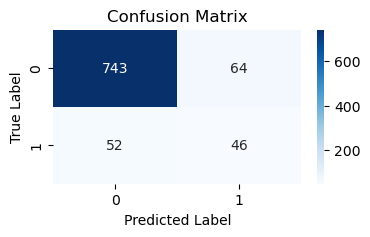

In [36]:
# Plot confusion matrix using Seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

True Negative (TN): 743 - The number of times the model correctly predicted the negative class (e.g., a customer not purchasing the product).
False Positive (FP): 64 - The number of times the model incorrectly predicted the positive class (e.g., a customer purchasing the product when they did not).
False Negative (FN): 52 - The number of times the model incorrectly predicted the negative class (e.g., a customer not purchasing the product when they did).
True Positive (TP): 46 - The number of times the model correctly predicted the positive class (e.g., a customer purchasing the product).

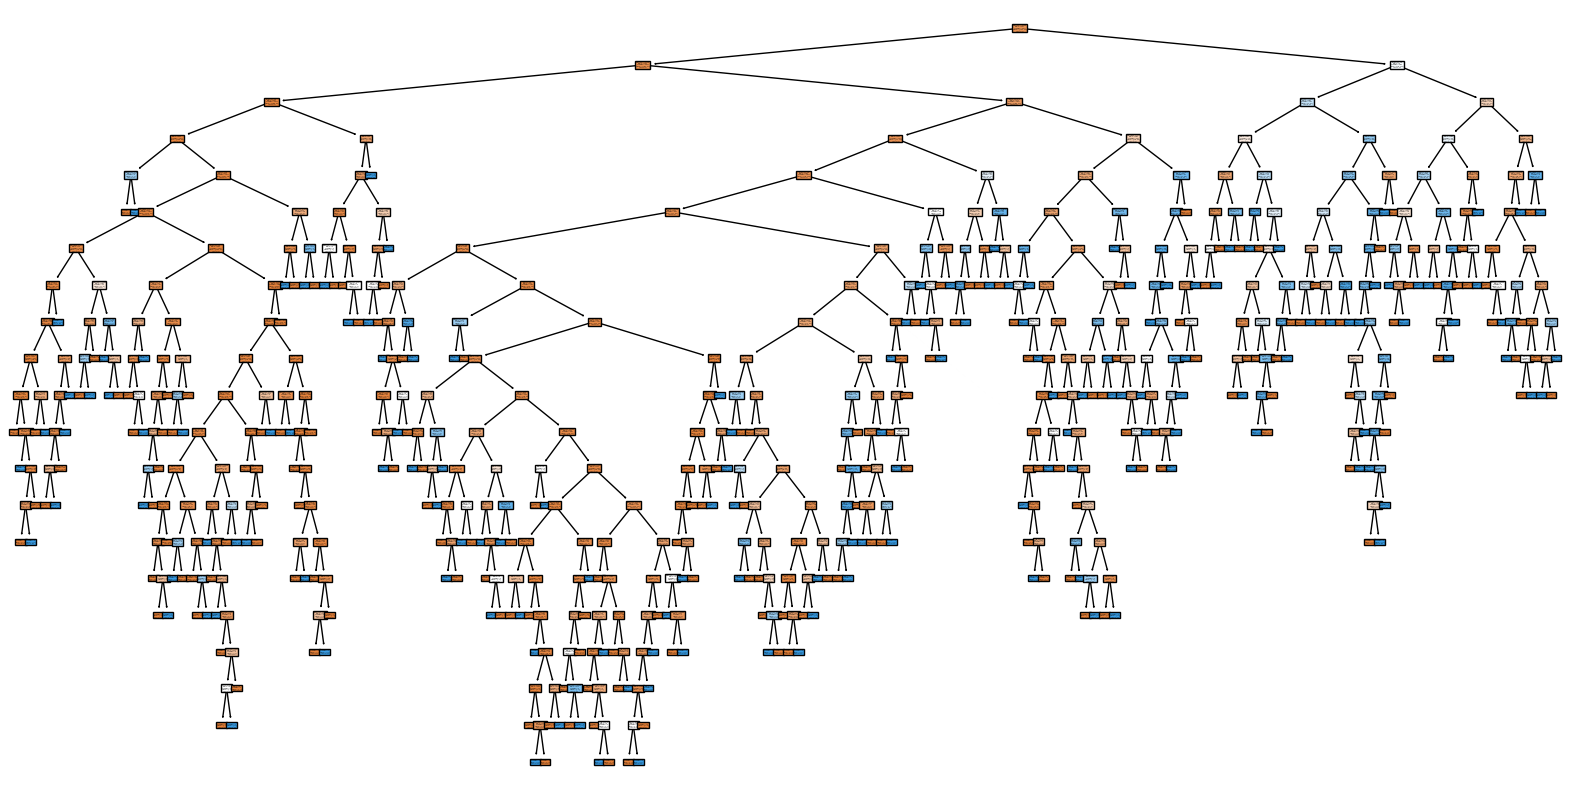

In [39]:
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()